# **RNN**
A recurrent neural network (RNN) is a class of artificial neural network where connections between units form a directed cycle. This creates an internal state of the network which allows it to exhibit dynamic temporal behavior.

IMDB sentiment classification task

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. IMDB provided a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

You can download the dataset from http://ai.stanford.edu/~amaas/data/sentiment/  or you can directly use 
" from keras.datasets import imdb " to import the dataset.

Few points to be noted:
Modules like SimpleRNN, LSTM, Activation layers, Dense layers, Dropout can be directly used from keras

For preprocessing, you can use required 

In [1]:
#load the imdb dataset 
from keras.datasets import imdb

vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

17473536/17464789 [==============================] - 1s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


In [17]:
#the review is stored as a sequence of integers. 
# These are word IDs that have been pre-assigned to individual words, and the label is an integer

ri = 0  # Review index
print('---review---')
print(X_train[ri])
print('---label---')
print(y_train[ri])

# to get the actual review
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[ri]])
print('---label---')
print(y_train[ri])

---review---
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
---label---
1
---review with words---
['the', 'as', 'you', 'wi

In [24]:
#pad sequences (write your code here)
from keras.preprocessing import sequence

# Pad with zeros (or truncate to max_length)
max_len = 70
X_train = sequence.pad_sequences(X_train, max_len)
X_test = sequence.pad_sequences(X_test, max_len)


In [55]:
#design a RNN model (write your code)
from keras import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from keras.activations import relu, sigmoid

model = Sequential()
model.add(Embedding(vocabulary_size, 32))
model.add(SimpleRNN(16, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation=relu))
model.add(Dropout(0.2, input_shape=(10,)))
model.add(Dense(1, activation=sigmoid))

model.summary()
model(X_train[[0]]) # Example (push data through model and test)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          160000    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_14 (Dense)            (None, 10)                170       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 160,965
Trainable params: 160,965
Non-trainable params: 0
_________________________________________________________________


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.50625575]], dtype=float32)>

In [58]:
#train and evaluate your model
#choose your loss function and optimizer and mention the reason to choose that particular loss function and optimizer
# use accuracy as the evaluation metric
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy

model.compile(optimizer=Adam(), 
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy()])

**Adam Optimizer**: Was chosen because of generalizing power. It considers the exponentially weighted average of the momentum (previous gradients) as well as includes accommodation for RMS Prop. So it combines gradient descent, momentum and RMS Prop. It is very commonly used and proven to be very effective in the literature.

> Reference: YouTube [Adam Optimization Algorithm (C2W2L08)](https://www.youtube.com/watch?v=JXQT_vxqwIs)

**Binary Cross-Entropy** loss: Was chosen because the problem is a binary classification problem. The goal of the model is actually to give the probabilistic output (sigmoid output), therefore `from_logits=False` (default parameter). This is basically $L = -(y_i \textup{log}(p_i) + (1-y_i) \textup{log}(1-p_i))$. It is a widely used loss function for binary classification problems.

> Reference: [ml-cheatsheet.readthedocs.io](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy)

**Binary Accuracy** metric: This is used for calculating the accuracy on binary classification tasks. When the labels are binary (0 or 1), it's suggested to use [BinaryAccuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy) over [Accuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) (which performs an exact comparison).

In [60]:
batch_size = 32
num_epochs = 5  # 5 epochs

history = model.fit(X_train, y_train, batch_size=batch_size, 
    epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 88s 113ms/step - loss: 0.5115 - binary_accuracy: 0.7559 - val_loss: 0.4621 - val_binary_accuracy: 0.7893
Epoch 2/5
782/782 [==============================] - 88s 112ms/step - loss: 0.4595 - binary_accuracy: 0.7969 - val_loss: 0.4490 - val_binary_accuracy: 0.8029
Epoch 3/5
782/782 [==============================] - 89s 113ms/step - loss: 0.4313 - binary_accuracy: 0.8140 - val_loss: 0.4660 - val_binary_accuracy: 0.8004
Epoch 4/5
782/782 [==============================] - 90s 116ms/step - loss: 0.4109 - binary_accuracy: 0.8261 - val_loss: 0.4388 - val_binary_accuracy: 0.8059
Epoch 5/5
782/782 [==============================] - 91s 116ms/step - loss: 0.3947 - binary_accuracy: 0.8346 - val_loss: 0.4564 - val_binary_accuracy: 0.7928


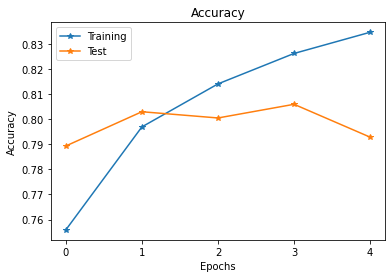

In [77]:
from matplotlib import pyplot as plt
import numpy as np
# Main plot
plt.figure()
plt.title("Accuracy")
plt.plot(history.history["binary_accuracy"], '*-', label="Training")
plt.plot(history.history["val_binary_accuracy"], '*-', label="Test")
plt.xlabel("Epochs")
plt.xticks(np.arange(num_epochs))
plt.ylabel("Accuracy")
plt.legend()

In [61]:
#evaluate the model using model.evaluate()
score, acc = model.evaluate(X_test, y_test)
print(f"Test score: {score}, accuracy: {acc*100:.3f}%")

782/782 [==============================] - 10s 12ms/step - loss: 0.4564 - binary_accuracy: 0.7928
Test score: 0.45637550950050354, accuracy: 79.280%


In [62]:
# Save the model
from keras.models import save_model
save_model(model, "./simplernn")

INFO:tensorflow:Assets written to: ./simplernn\assets


# **LSTM**

Instead of using a RNN, now try using a LSTM model and compare both of them. Which of those performed better and why ?


In [79]:
# LSTM Model
model = Sequential()
model.add(Embedding(vocabulary_size, 32))
model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation=relu))
model.add(Dropout(0.2, input_shape=(10,)))
model.add(Dense(1, activation=sigmoid))
# Summary
model.summary()
model(X_train[[0]]) # Example (push data through model and test)
# Compilation (same metrics, optimizer and loss function)
model.compile(optimizer=Adam(), 
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy()])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense_18 (Dense)            (None, 10)                170       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 163,317
Trainable params: 163,317
Non-trainable params: 0
_________________________________________________________________


Usually, one could use the [parameters required](https://keras.io/api/layers/recurrent_layers/lstm/) for cuDNN kernels. But since we're trying so see the effects of swapping [SimpleRNN](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN) with [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM), let this be.

In [80]:
# Train the model (same parameters)
batch_size = 32
num_epochs = 5  # 5 epochs

history = model.fit(X_train, y_train, batch_size=batch_size, 
    epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 300s 382ms/step - loss: 0.4845 - binary_accuracy: 0.7649 - val_loss: 0.3879 - val_binary_accuracy: 0.8283
Epoch 2/5
782/782 [==============================] - 301s 384ms/step - loss: 0.3490 - binary_accuracy: 0.8541 - val_loss: 0.3707 - val_binary_accuracy: 0.8345
Epoch 3/5
782/782 [==============================] - 298s 381ms/step - loss: 0.3055 - binary_accuracy: 0.8718 - val_loss: 0.3842 - val_binary_accuracy: 0.8335
Epoch 4/5
782/782 [==============================] - 302s 387ms/step - loss: 0.2760 - binary_accuracy: 0.8844 - val_loss: 0.4186 - val_binary_accuracy: 0.8301
Epoch 5/5
782/782 [==============================] - 301s 385ms/step - loss: 0.2507 - binary_accuracy: 0.8963 - val_loss: 0.4580 - val_binary_accuracy: 0.8241


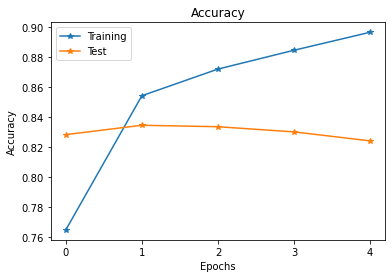

In [81]:
# Plot curves
plt.figure()
plt.title("Accuracy")
plt.plot(history.history["binary_accuracy"], '*-', label="Training")
plt.plot(history.history["val_binary_accuracy"], '*-', label="Test")
plt.xlabel("Epochs")
plt.xticks(np.arange(num_epochs))
plt.ylabel("Accuracy")
plt.legend()

In [82]:
# Test using evaluate
score, acc = model.evaluate(X_test, y_test)
print(f"Test score: {score}, accuracy: {acc*100:.3f}%")

782/782 [==============================] - 28s 35ms/step - loss: 0.4580 - binary_accuracy: 0.8241
Test score: 0.4579967260360718, accuracy: 82.412%


In [83]:
# Save the model
save_model(model, "./simplelstm")

INFO:tensorflow:Assets written to: ./simplelstm\assets


As observed through the accuracy on the test set, the LSTM model is better than the simple RNN model

| Model | Test Acc. | Binary Acc. (Training) |
| :--- | :--- | :--- |
| `SimpleRNN` | 79.280 | 0.8346  |
| `LSTM` | 82.412 | 0.8963 |

In the simple RNN, the layer is

```txt
simple_rnn_7 (SimpleRNN)    (None, 16)                784       
```

In the LSTM, the layer description is

```txt
lstm_1 (LSTM)               (None, 16)                3136      
```

The LSTM cells have more number of parameters, as well as options to better control the flow of information. The cells have a separate cell state (for storage). This helps them to capture longer term dependencies, which is helpful in sequential data. Each LSTM cell performs four essential steps (forget, store, update and output), thereby having about four times as many parameters as a simple RNN.

<a href="https://en.wikipedia.org/wiki/Long_short-term_memory"> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/LSTM_Cell.svg/1200px-LSTM_Cell.svg.png" alt="LSTM Cell (Wikipedia)" height=250 style="background-color: #ffffff;" /> </a>

## Error Analysis and Explanation

Perform Error analysis and explain using few examples.

### Error Analysis

As seen above, the errors are described in the table. The testing error is lesser for LSTM (than for SimpleRNN). A sample (that has been misclassified) is shown below

In [120]:
ytest_pred = model(X_test).numpy().flatten()  # Predictions
ytd_pred = np.array([1 if y > 0.5 else 0 
    for y in ytest_pred]) # Threshold
# Indices that do not match
mismatch_i = np.array([i for i, yp in enumerate(ytd_pred) 
    if yp != y_test[i]])
acc_test = 1 - mismatch_i.shape[0] / y_test.shape[0]    # Accuracy
print(f"Accuracy on test set is: {acc * 100:.3f} %")

Accuracy on test set is: 82.412 %


In [133]:
# Inspect an index
i = np.random.choice(mismatch_i)    # Index to inspect
print(f"Inspecting test sample number {i}")
print(f"Prediction: {ytest_pred[i]:.5f} (= {ytd_pred[i]})")
print(f"Actual: {y_test[i]}")
print()
print('---review---')
print(X_test[i])
print('---label---')
print(y_test[i])
print()
print('---review with words---')
print([id2word.get(k, ' ') for k in X_test[i]])
print('---label---')
print(y_test[i])

Inspecting test sample number 18308
Prediction: 0.61939 (= 1)
Actual: 0

---review---
[ 178    2    2   10   10    5  259  334 1495   15   54    2   16 4255
    4 3885    5  258   15 2138   15   54   29  120    4 4304    4    2
 2674   35    2    5  161  471   83    6  117  508   40   32   81   54
   25    2   23    6   13  384   48  335 2146   28    4 3077  297  141
    6    2  217   11  129   20   33  222   79    4  117  183  208    2]
---label---
0

---review with words---
['want', 'and', 'and', 'i', 'i', 'to', 'especially', 'fan', 'laughed', 'for', 'no', 'and', 'with', 'edie', 'of', 'greek', 'to', 'although', 'for', 'trek', 'for', 'no', 'all', 'show', 'of', 'forms', 'of', 'and', 'stays', 'so', 'and', 'to', 'nothing', "i'd", 'first', 'is', 'over', 'act', 'just', 'an', 'people', 'no', 'have', 'and', 'are', 'is', 'was', 'let', 'what', 'poor', 'painfully', 'one', 'of', 'lessons', '1', 'should', 'is', 'and', 'almost', 'this', 'man', 'on', 'they', "there's", 'also', 'of', 'over', 'seems'

### Explanation

It is observed that when the words are not unique, specially when there are too many articles and pronouns (generally available worlds of high frequency). This is observed by the following review

```txt
Inspecting test sample number 16672
Prediction: 0.03091 (= 0)
Actual: 1

---review---
[   2   72    2   13   30   35 3111 1544    5   95  225    4 2749  698
    2    5    4 2749  328    2   19    2    5  417 1705  253    4  132
   23    4  393    7    4 1225 1449  600   10   10   14   20  218  629
   21    9    9  642   13 1498   61 3625  125    4  226   96  143    5
   13  386   14   18  259   37 1232    6   52   78   20   10   10   46]
---label---
1

---review with words---
['and', 'we', 'and', 'was', 'at', 'so', 'pride', 'park', 'to', 'them', 'music', 'of', 'facial', 'non', 'and', 'to', 'of', 'facial', 'simply', 
'and', 'film', 'and', 'to', 'case', 'energy', 'played', 'of', 'say', 'are', 'of', 'school', 'br', 'of', 'generally', 'lived', 'score', 'i', 'i', 
'as', 'on', 'interesting', 'hero', 'not', 'it', 'it', 'started', 'was', 'mediocre', 'only', 'notes', 'better', 'of', 'script', 'too', "i'm", 'to', 
'was', 'wonderful', 'as', 'but', 'especially', 'like', 'pathetic', 'is', 'very', 'do', 'on', 'i', 'i', 'some']
---label---
1
```

The above sample has too many articles (a, an, the) and pronouns (i, we, them). This could have made the decision process tougher.

Another observation is that out of the times the algorithm misclassified, most were classifying a true 1 as a 0, than true 0 as a 1. See the confusion matrix on this below.

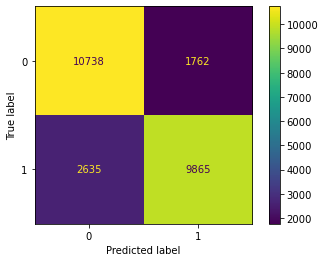

In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, ytd_pred),
    display_labels=[0, 1])
disp.plot()
plt.show()

An example where a true 1 was classified as a zero is shown above. An example of a true zero being classified as a one is shown below

```txt
Inspecting test sample number 18308
Prediction: 0.61939 (= 1)
Actual: 0

---review---
[ 178    2    2   10   10    5  259  334 1495   15   54    2   16 4255
    4 3885    5  258   15 2138   15   54   29  120    4 4304    4    2
 2674   35    2    5  161  471   83    6  117  508   40   32   81   54
   25    2   23    6   13  384   48  335 2146   28    4 3077  297  141
    6    2  217   11  129   20   33  222   79    4  117  183  208    2]
---label---
0

---review with words---
['want', 'and', 'and', 'i', 'i', 'to', 'especially', 'fan', 'laughed', 'for', 'no', 'and', 'with', 'edie', 'of', 'greek', 'to', 'although', 'for', 
'trek', 'for', 'no', 'all', 'show', 'of', 'forms', 'of', 'and', 'stays', 'so', 'and', 'to', 'nothing', "i'd", 'first', 'is', 'over', 'act', 'just', 
'an', 'people', 'no', 'have', 'and', 'are', 'is', 'was', 'let', 'what', 'poor', 'painfully', 'one', 'of', 'lessons', '1', 'should', 'is', 'and', 
'almost', 'this', 'man', 'on', 'they', "there's", 'also', 'of', 'over', 'seems', 'times', 'and']
---label---
0
```

Here, we see too many _less_ frequent words. Maybe the model has overfit on a few words that have too high a weightage. As it is, the prediction value for this misclassification is lower than the value for classifications that are really `1` (correctly labelled `1`). It's because of the thresholding set at 0.5, that this got classified as 1. You can see an example of the value here

```txt
y_test[1] -> 1
ytest_pred[1] -> 0.9953   (approx 1 already)
```

This is the conclusion of the explanation through looking at misclassified results. Maybe a more detailed result can be obtained through tools like [shap](https://github.com/slundberg/shap) (which aim to explore how the network has understood aspects of data).

In [ ]:
# Some rough work!